<a href="https://colab.research.google.com/github/oscarserc/TESIS/blob/main/PASO_3a___PERCEPTRON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UTILIZACIÓN DE TÉCNICAS DE APRENDIZAJE AUTOMÁTICO PARA LA DETECCIÓN DE LOS NODOS INFLUYENTES.

La base de datos que emplearemos será de unas 70.000 observaciones. En concreto:

· 72.000 observaciones

· Para ello generamos una 1800 **simulaciones**, y guardamos unos 40 **frames** de cada una de ellas

· Además como **target** guardamos la matriz con la IDENTIDAD de todos y cada uno de los AGENTES.



#**PRUEBA 1**: Planteamos un problema de **Clasificación**. Entrenaremos una Red Neuronal para detectar el tipo de mezcla poblacional ante la que nos encontramos.


<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Archivo_C.png?raw=true' width="850"/>
<figcaption></figcaption></center>
</figure>


#Podemos empezar por lo más sencillo. Utilizamos un <font color='green'>**PERCEPTRÓN MULTICAPA**</font>.

<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Esquema_RN_3b_corregido.png?raw=true' width="650"/>
<figcaption>fig. 1: Transformamos la matriz en un vector de dimensión 1 y, para simplificar, lo convertimos a una escala de grises. En estas condiciones podemos introducirlo como entrada de la Red Neuronal Densamente Conectada.</figcaption></center>
</figure>


A) Cargamos la base de datos de simulaciones. Para empezar utilizamos sólo simulaciones con **AGENTES EMOCIONALES** únicamente (target=0), o una población con **AGENTES MUTANTES TRAIDORES** infiltrados (target=1).

#Aleatorizando las filas.

In [ ]:

import pandas as pd

# Cargamos los datos
# ------------------
bd_simulaciones = pd.read_csv('bd_combinado.csv')

# Aleatorizamos
# -------------
bd_simulaciones = bd_simulaciones.sample(frac=1).reset_index(drop=True)



#Sin aleatorizar.

In [ ]:

# Cargamos los datos pero no aleatorizamos
# ------------------
bd_simulaciones = pd.read_csv('bd_combinado.csv')


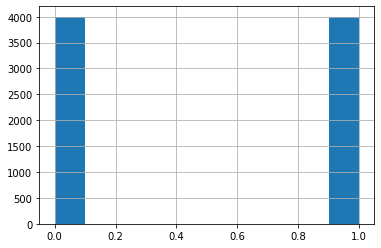

In [ ]:

bd_simulaciones.iloc[:,303].hist()


#Prueba de convertir el RGB a GRIS.

In [ ]:

df = bd_simulaciones.copy()

size = 10
nombres_columnas_gris = ['gris' + str(indice) for indice in range(size*size)]

df_gris = pd.DataFrame(columns=nombres_columnas_gris)
#nuevo_frame = []
gris  = []

indices_r, indices_v, indices_a = [], [], []

for obs in range(len(df)):
  for pixel in range (100):
      columna_r = pixel
      columna_v = (size*size) + pixel
      columna_a = 2*(size*size) + pixel
      gris.append((df.iloc[obs, columna_r] + df.iloc[obs, columna_v] + df.iloc[obs, columna_a]) / 3.)
      #indices_r.append(columna_r)
      #indices_v.append(columna_v)
      #indices_a.append(columna_a)
  #nuevo_frame = nuevo_frame + gris
  frame  = pd.DataFrame([gris], columns=nombres_columnas_gris)
  df_gris = pd.concat([df_gris, frame], ignore_index=True)
  gris = []

df_gris


,gris0,gris1,gris2,gris3,gris4,gris5,gris6,gris7,gris8,gris9,...,gris90,gris91,gris92,gris93,gris94,gris95,gris96,gris97,gris98,gris99
0,0.333333,0.466667,0.466667,0.600000,0.466667,0.466667,0.466667,0.333333,0.600000,0.555556,...,0.555556,0.466667,0.333333,0.333333,0.333333,0.466667,0.466667,0.466667,0.600000,0.555556
1,0.333333,0.466667,0.466667,0.600000,0.466667,0.466667,0.466667,0.333333,0.600000,0.555556,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.466667,0.466667,0.600000,0.555556
2,0.333333,0.466667,0.466667,0.600000,0.466667,0.466667,0.466667,0.333333,0.600000,0.555556,...,0.333333,0.333333,0.333333,0.333333,0.466667,0.466667,0.600000,0.466667,0.600000,0.555556
3,0.333333,0.466667,0.466667,0.600000,0.466667,0.466667,0.466667,0.333333,0.600000,0.555556,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.466667,0.466667,0.600000,0.555556
4,0.333333,0.466667,0.466667,0.600000,0.466667,0.466667,0.466667,0.333333,0.600000,0.555556,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.466667,0.466667,0.600000,0.555556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
7996,0.333333,0.333333,0.466667,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
7997,0.555556,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333
7998,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,...,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333


B) Creamos una clase para convertir en **tensores** los datos. Posteriormente procedemos a utilizar la clase ***DataLoader*** para poder iterar por ellos seleccionando batches para el entrenamiento.

In [ ]:

import numpy as np
import torch

# PRIMERO TENEMOS QUE EXTRAER LA MATRIX:  X
# que contendrá sólo imágenes (obtenidas con np.stack del 'csv')
# y los valores del TARGET:               Y
#
# Luego pasaremos (X, Y) al Dataset que creamos a continuación.
# --------------------------------------------------------------

X_train = df_gris.iloc[:,:100].values
Y_train = bd_simulaciones.iloc[:,303]

# CREAMOS UNA CLASE PARA LOS DATOS
# ================================

class Dataset_frames(torch.utils.data.Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X).float()
    self.Y = torch.tensor(Y).long()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return self.X[ix], self.Y[ix]

dataset    = Dataset_frames(X_train, Y_train)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=40, shuffle=False)


#Con TRAIN_TEST_SPLIT

In [ ]:

import numpy as np
import torch

# PRIMERO TENEMOS QUE EXTRAER LA MATRIX:  X
# que contendrá sólo imágenes (obtenidas con np.stack del 'csv')
# y los valores del TARGET:               Y
#
# Luego pasaremos (X, Y) al Dataset que creamos a continuación.
# --------------------------------------------------------------

X_train = bd_simulaciones.iloc[:,:100].values
Y_train = bd_simulaciones.iloc[:,303]

# CREAMOS UNA CLASE PARA LOS DATOS
# ================================

class Dataset_frames(torch.utils.data.Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X).float()
    self.Y = torch.tensor(Y.to_numpy()).long()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return self.X[ix], self.Y[ix]


# SELECCIONANDO GRUPOS DE OBSERVACIONES PARA VALIDACIÓN
# -----------------------------------------------------

from sklearn.model_selection import train_test_split

X_subset, X_val, Y_subset, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)

dataset = {
    'train' : Dataset_frames(X_subset, Y_subset),
    'val'   : Dataset_frames(X_val, Y_val)
}    

dataloader = {
    'train' : torch.utils.data.DataLoader(dataset['train'], batch_size=40,   shuffle=False),
    'val'   : torch.utils.data.DataLoader(dataset['val'],   batch_size=40, shuffle=False)
}



#Creamos la RED COMPLETAMENTE CONECTADA. Empleamos el conjunto de entrenamiento y el de validación, para comprobar el desempeño de la red.

In [ ]:

# CONSTRUIMOS EL MODELO
# =====================

from sklearn.metrics import accuracy_score

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

# ---------------------------------------------------------------------
# Probamos inicialmente con un grid (10x10), por lo que D_in = 100 * 3 canales
# Introducimos una capa oculta de 50 neuronas (H = 150)
# Finalmente tanteamos una clasificación en 2 clases, según si hay sólo
# agentes EMOCIONALES o también MUTANTES (D_out = 2) 
# ---------------------------------------------------------------------

def build_model(D_in=100, H=50, D_out=2):
  model = torch.nn.Sequential(
      torch.nn.Linear(D_in, H),
      torch.nn.ReLU(),
      torch.nn.Linear(H, D_out)
  )
  return model


# DEFINIMOS LA FUNCIÓN DE ENTRENAMIENTO
# =====================================

def fit(model, dataloader, epochs=10, log_each=1):
   criterion = torch.nn.CrossEntropyLoss()
   optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

   l, acc         = [], []
   val_l, val_acc = [], []
   
   for e in range(1, epochs+1):
      _l, _acc = [], []
      model.train()  # <------------------------------------------ MODO de ENTRENAMIENTO
      for x_b, y_b in dataloader['train']:
        y_pred = model(x_b)
        loss   = criterion(y_pred, y_b)
        _l.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_probas = torch.argmax(softmax(y_pred), axis=1)
        _acc.append(accuracy_score(y_b.numpy(), y_probas.detach().numpy()))

      l.append(np.mean(_l))
      acc.append(np.mean(_acc))
      if not e % log_each:
        print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f}")

      model.eval()  # <------------------------------------------- MODO de EVALUACIÓN
      _l, _acc = [], []
      with torch.no_grad():
        for x_b, y_b in dataloader['val']:
          y_pred = model(x_b)
          loss   = criterion(y_pred, y_b)
          _l.append(loss.item())
          y_probas = torch.argmax(softmax(y_pred), axis=1)
          _acc.append(accuracy_score(y_b.numpy(), y_probas.numpy()))
      val_l.append(np.mean(_l))
      val_acc.append(np.mean(_acc))  

   return {'epoch':list(range(1,epochs+1)), 'loss':l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}  



In [ ]:

# INSTANCIAMOS EL MODELO
# ======================

model  = build_model()
hist   = fit(model, dataloader, 10)


Epoch 1/10 loss 0.02600 acc 0.99266
Epoch 2/10 loss 0.00069 acc 1.00000
Epoch 3/10 loss 0.00036 acc 1.00000
Epoch 4/10 loss 0.00024 acc 1.00000
Epoch 5/10 loss 0.00018 acc 1.00000
Epoch 6/10 loss 0.00014 acc 1.00000
Epoch 7/10 loss 0.00012 acc 1.00000
Epoch 8/10 loss 0.00010 acc 1.00000
Epoch 9/10 loss 0.00008 acc 1.00000
Epoch 10/10 loss 0.00007 acc 1.00000


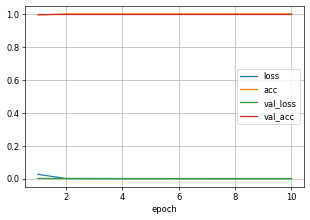

In [ ]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
ax  = plt.subplot(111)
#ax.legend(loc='upper right')
pd.DataFrame(hist).plot(x='epoch', grid=True, ax=ax)
plt.show()


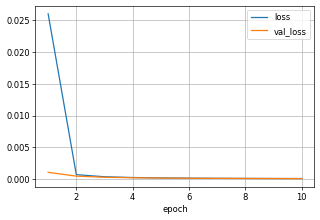

In [ ]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['loss','val_loss'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


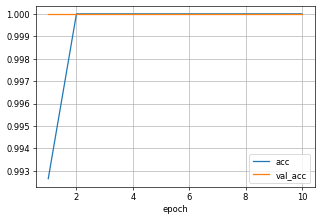

In [ ]:

fig = plt.figure(dpi=60)
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['acc', 'val_acc'], grid=True, ax=ax)
plt.show()


Representamos algunas de las simulaciones. Las primeras 4000 observaciones del archivo corresponden a mezcla poblacional con AGENTES **Traidores** y **Emocionales**. Si empleamos la casilla de aleatorizar el archivo saldrán aquí mezcladas. Se reconocen fácilmente los emocionales al estar en equilibrio feliz.

#Cargando el archivo sin aleatorizar representamos algunas de las secuencias de cada tipo de población.

· Primero sin mezcla poblacional (todos agentes emocionales)

· Segundo introduciendo una población mutante (agentes traidores)


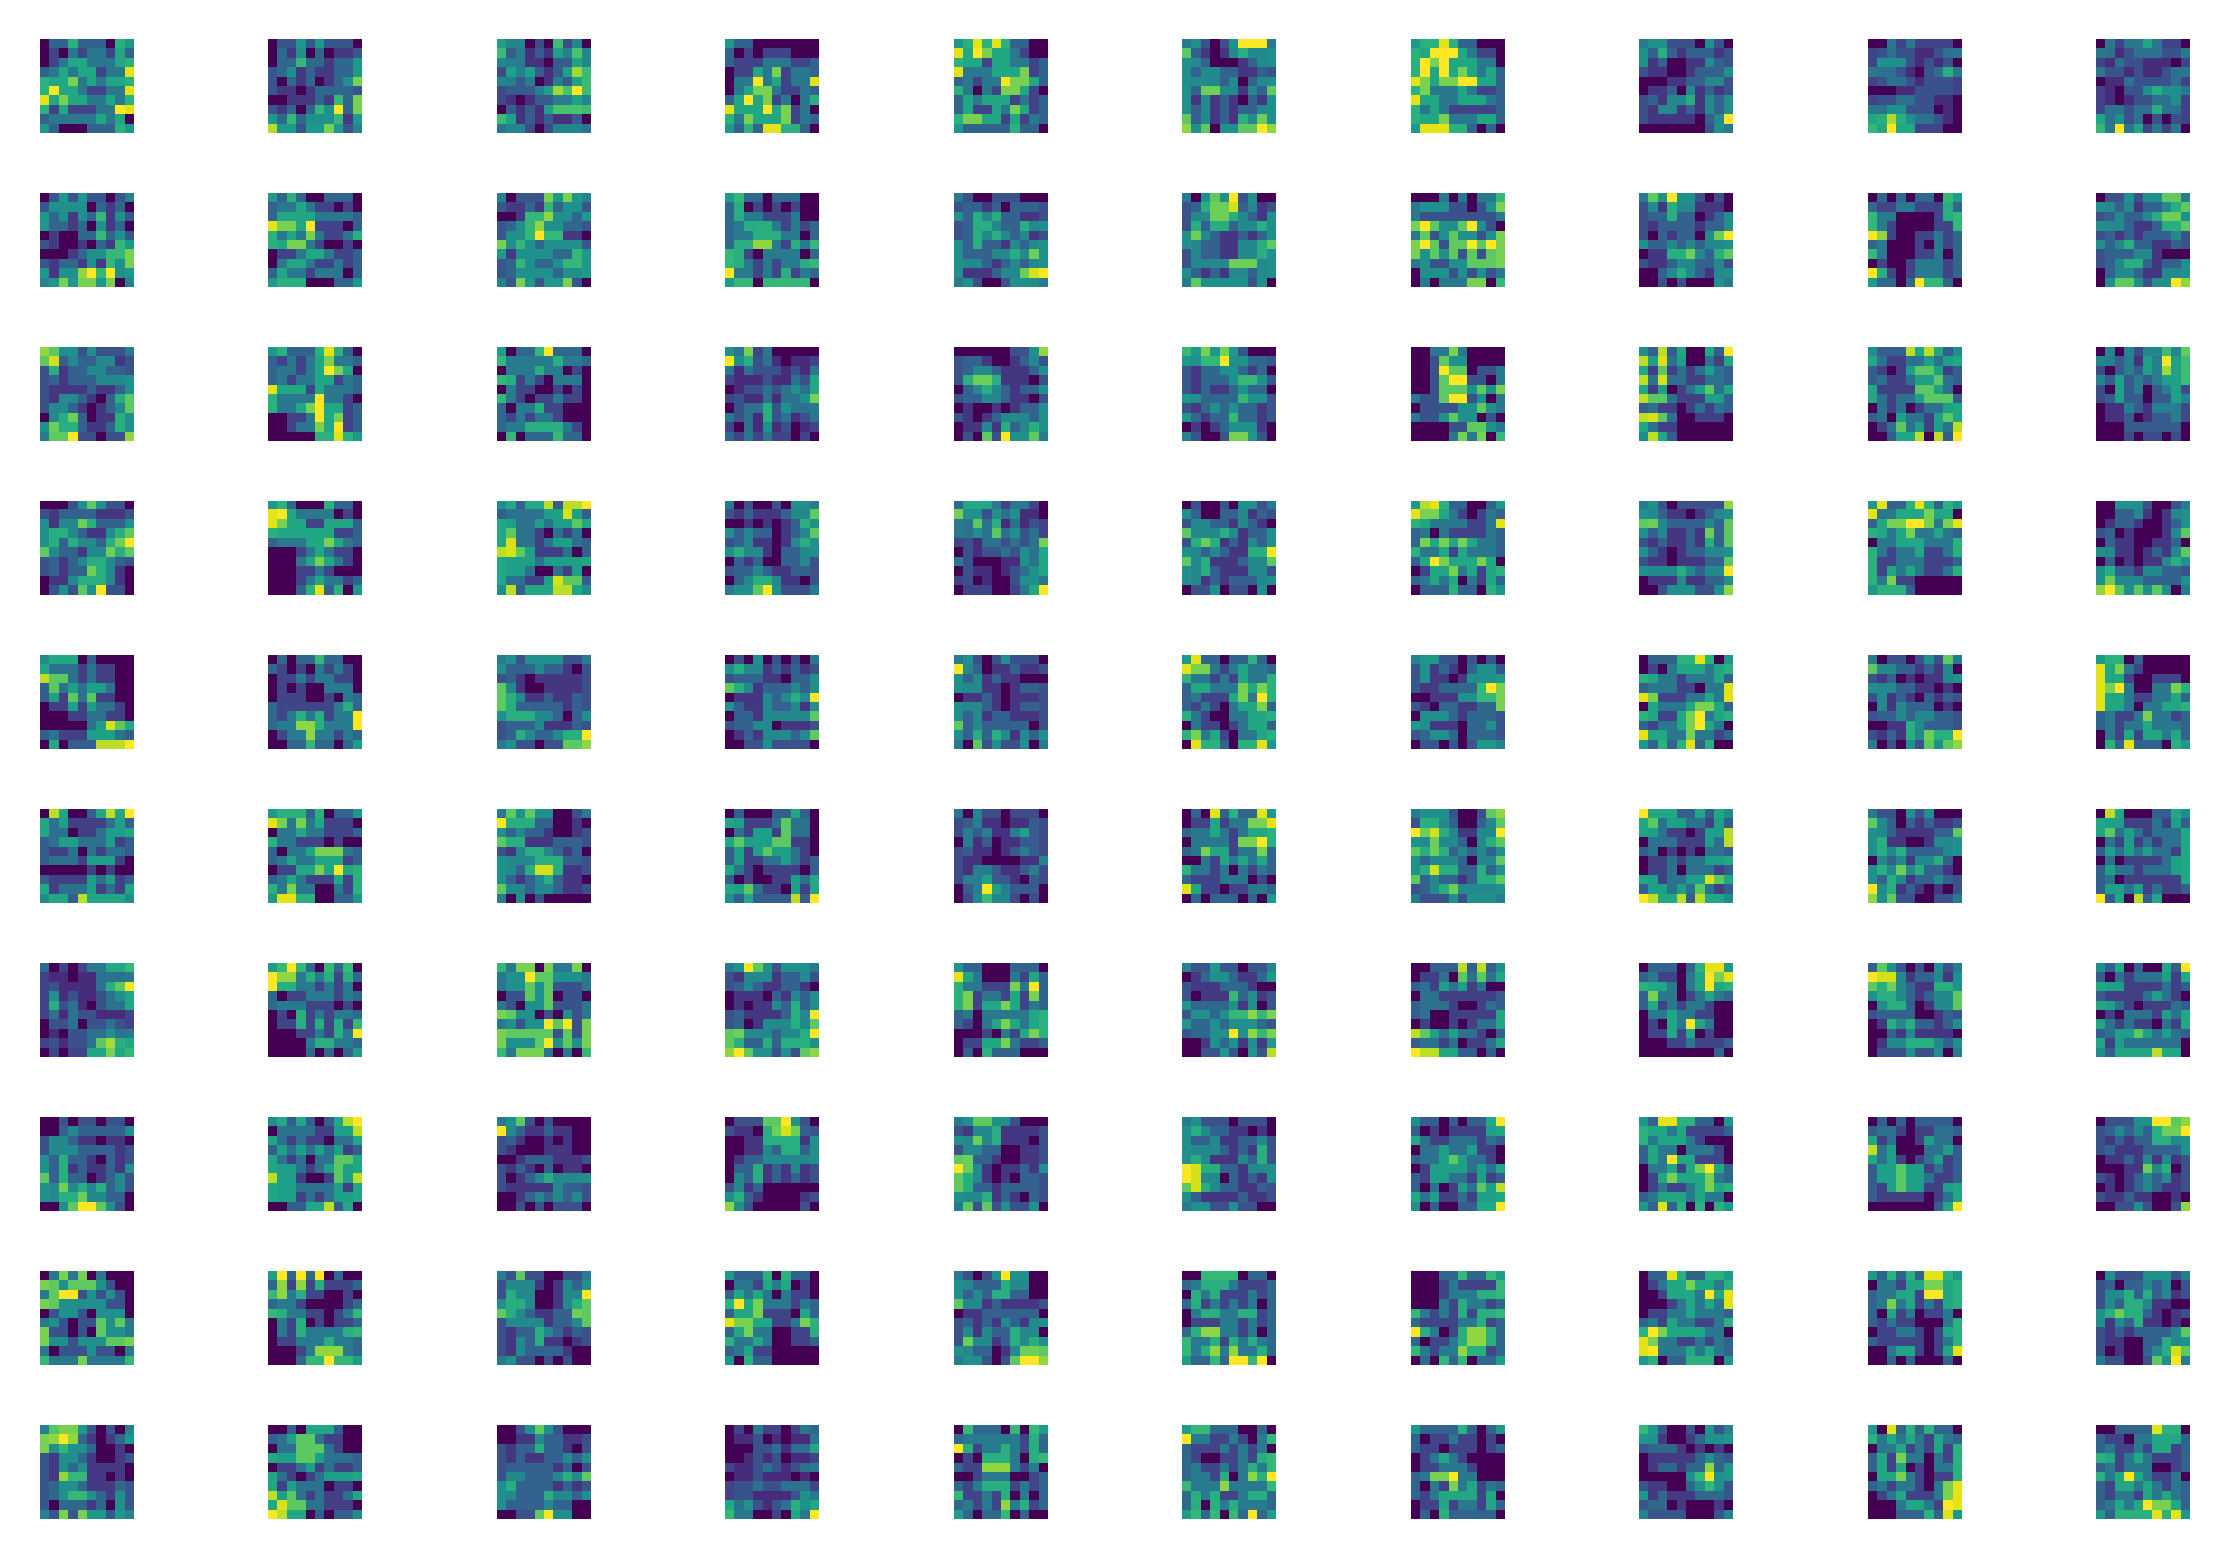

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Dado que las imágenes son una secuencia, cogemos el índice desplazado a saltos
# de 40, para coger frames de distintas simulaciones
# Si no, con emocionales salen muy parecidos
# ------------------------------------------------------------------------------

fig = plt.figure(dpi=400)
c, r = 10, 10
for j in range(r):
  for i in range(c):
    ix = j*c + i
    ax = plt.subplot(r, c, ix + 1)
    img   = np.array(df_gris.iloc[ix*40]).reshape(10,10)
    label = Y_train[ix*40]
    ax.imshow(img)
    #ax.set_title(Y_train[ix], fontsize=6)
    ax.axis('off')
plt.tight_layout()
plt.show()    



Las siguientes observaciones hasta las 8000 del archivo corresponden a una población únicamente formada por AGENTES **Emocionales**.

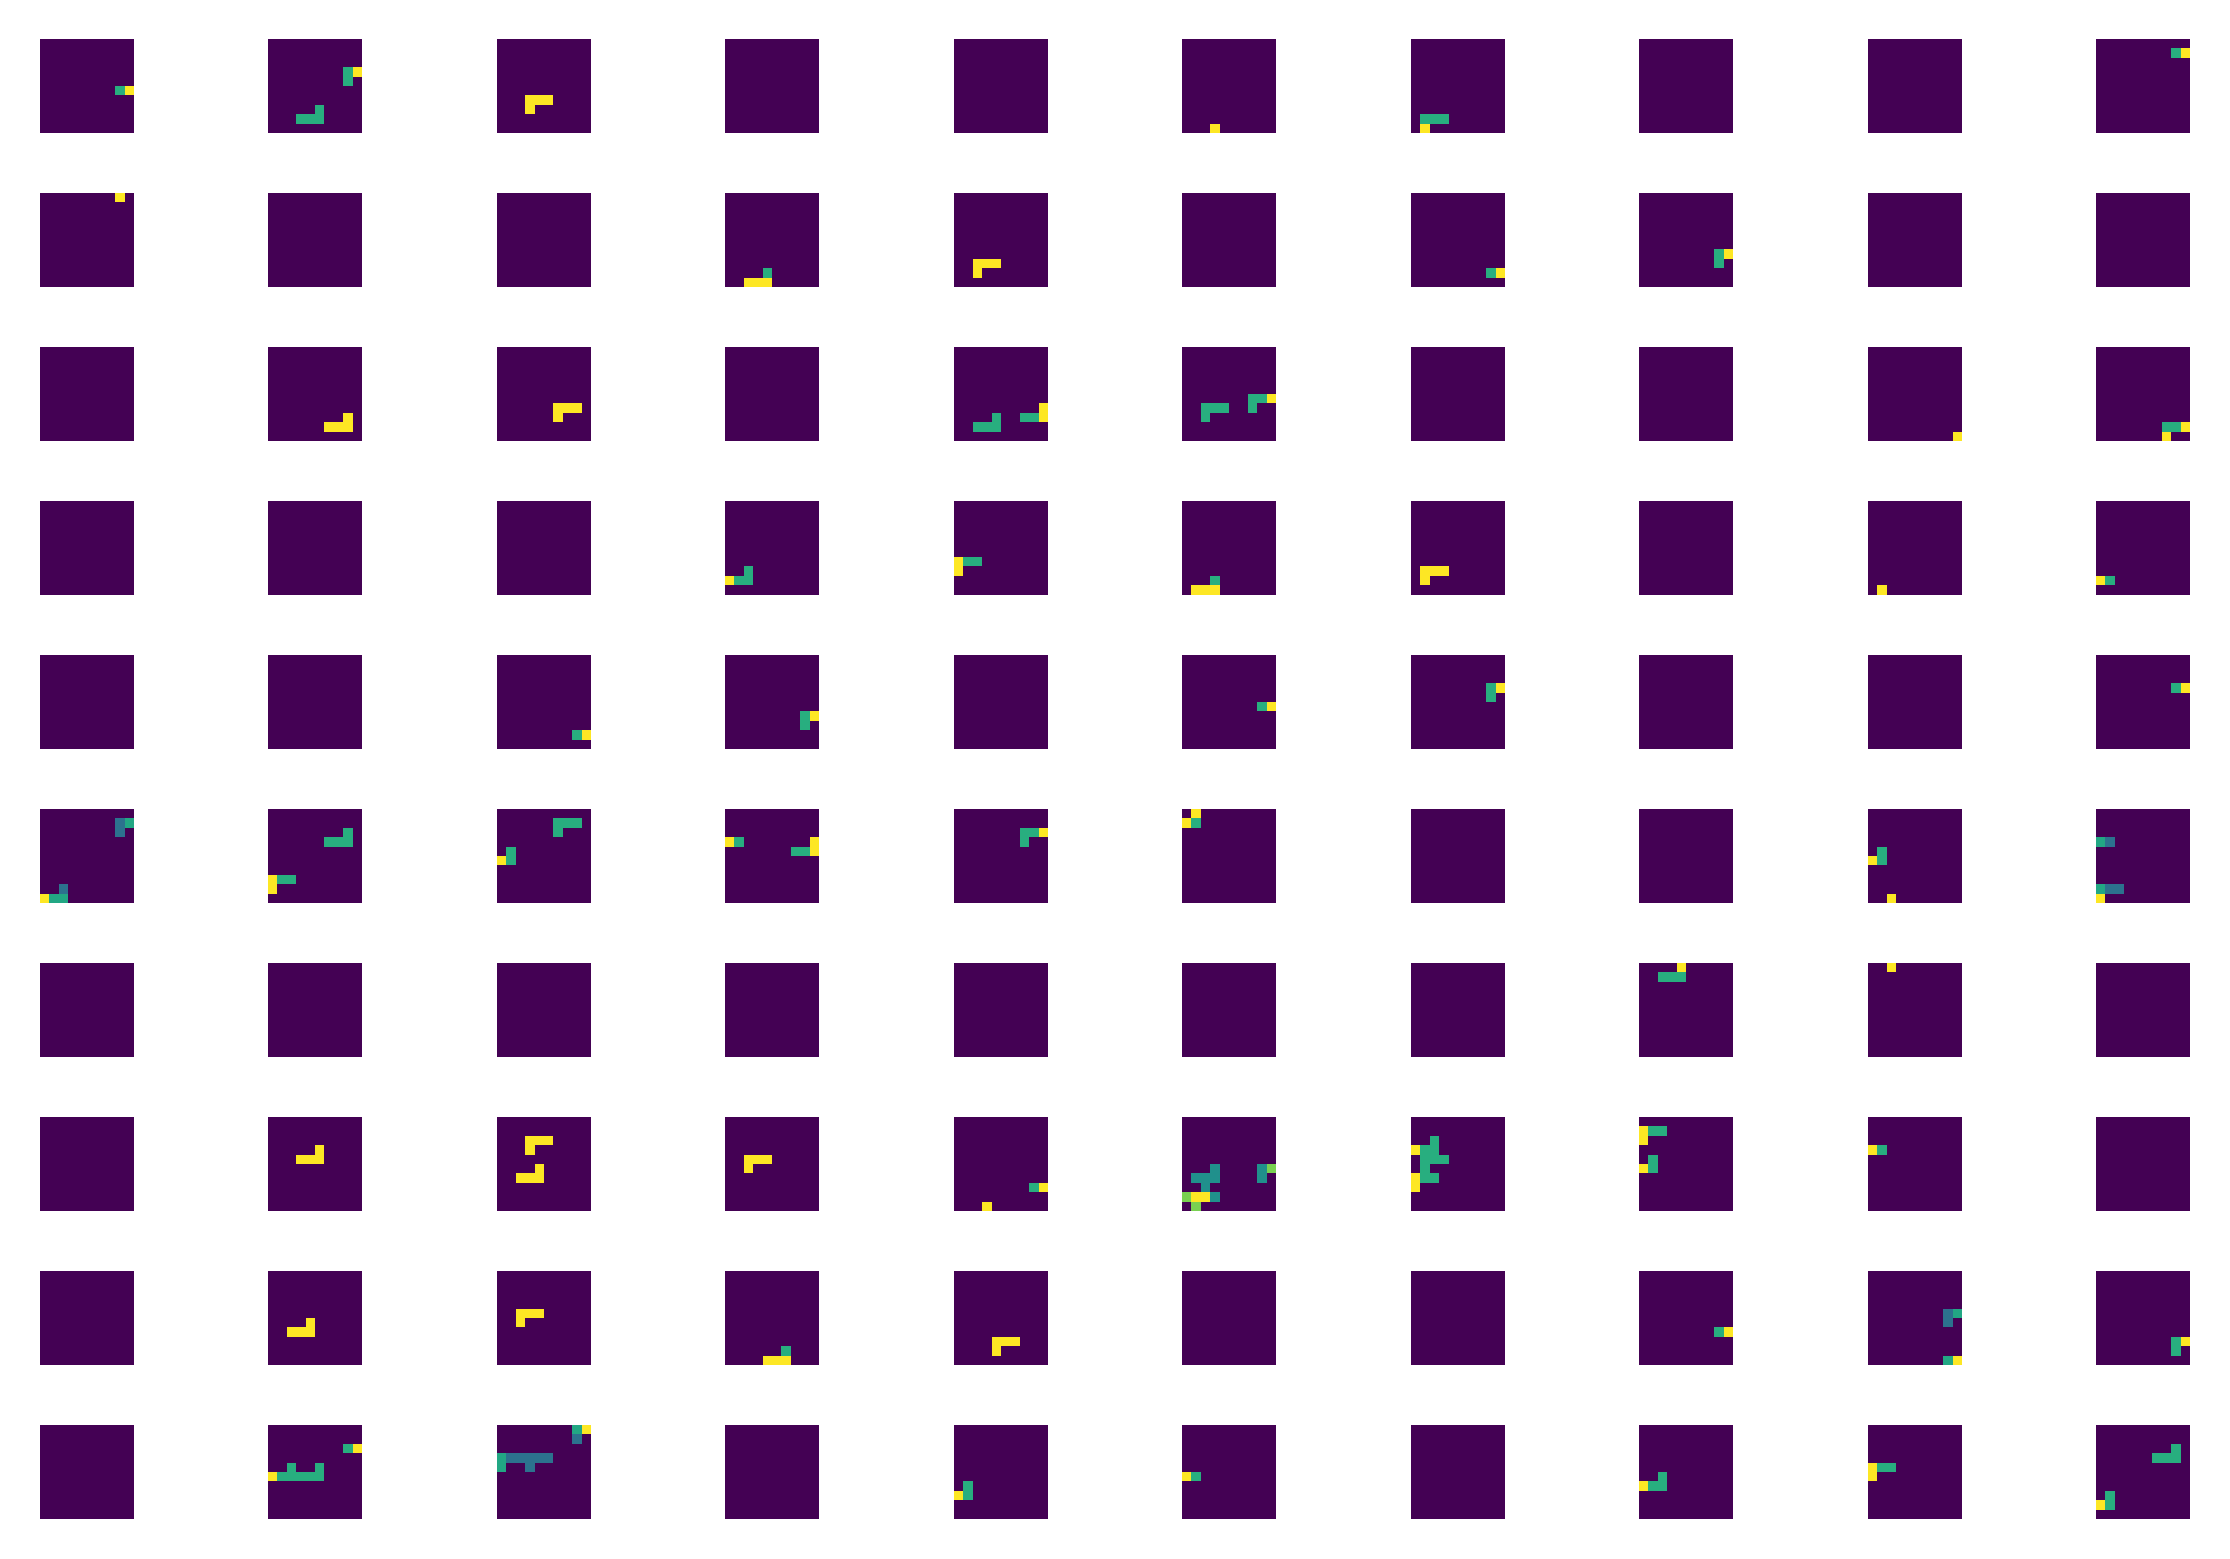

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

#plt.imshow(np.array(df_gris.iloc[1000]).reshape(10,10))
#plt.show()

fig = plt.figure(dpi=400)
c, r = 10, 10
for j in range(r):
  for i in range(c):
    ix = j*c + i
    ax = plt.subplot(r, c, ix + 1)
    img   = np.array(df_gris.iloc[4000 + ix]).reshape(10,10)
    label = Y_train[4000 + ix]
    ax.imshow(img)
    #ax.set_title(Y_train[ix], fontsize=6)
    ax.axis('off')
plt.tight_layout()
plt.show()    

